# day 138 and day 139, day 142

In [ ]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

# Multiclass classification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist


# train_test_split
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('x_train: {}'.format(x_train[0]))
print('y_test: {}'.format(y_test[0]))

x_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

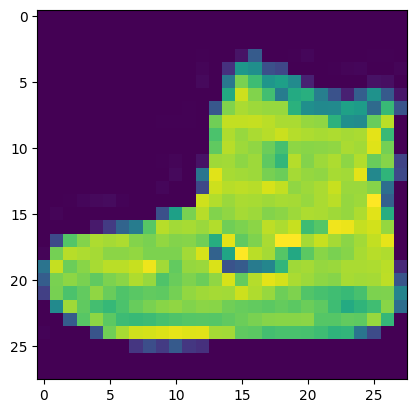

In [ ]:
# plot a single sample

plt.imshow(x_train[0])

plt.show()

In [ ]:
# giving names for the y labels
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

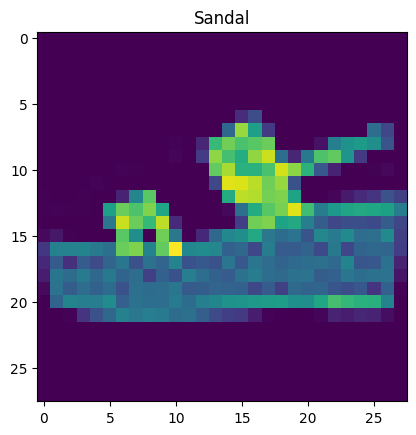

In [ ]:
# plotting an item with apt name

index = 12
plt.imshow(x_train[index])
plt.title(class_names[y_train[index]])

plt.show()

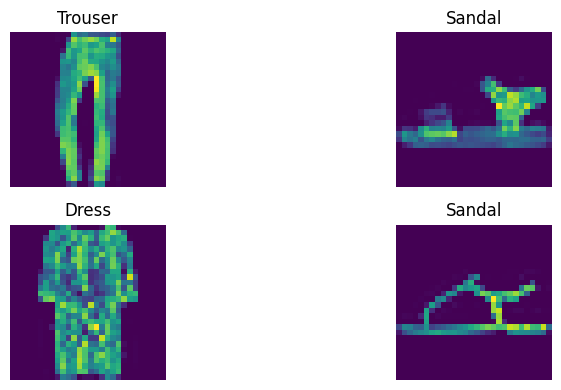

In [ ]:
# plotting multiple images in iteration
import random

how_many_images = 4
fig = plt.figure(figsize=(10,4))

for i in range(how_many_images):
  ax = plt.subplot(2,2,i+1)
  random_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[random_index])
  plt.title(class_names[y_train[random_index]])
  plt.axis(False)


plt.tight_layout()
plt.show()


# experiment, analysis and freethrows

In [ ]:
x = np.arange(12,55,1)
import random

random_index = random.choice(range(len(x)))
x[random_index]

26

<Axes: >

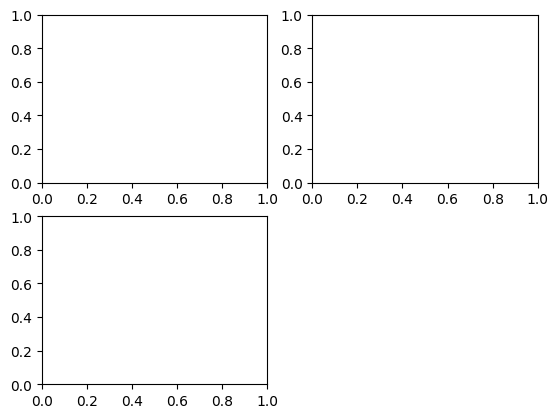

In [ ]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)


# building a model

# requirments:
1. determine the input shape. flatten the image first with the input shape.

2. determine the output shape

3. loss function is categorycrossentropy for multiclass classification.if your y_train and y_test labels are one-hot encoded then use CategoricalCrossentropy(),otherwise use SparseCategoricalCrossentropy().


4. output layer activation is 'softmax'

In [ ]:
# this is 'an' input shape

x_train[0].shape

(28, 28)

In [ ]:
# this is output shapes

len(class_names)

10

In [ ]:
# building the model with previous hidden layers and activation functions


# building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model.add(tf.keras.layers.Dense(2,activation='tanh',name='hidden_layer2'))
model.add(tf.keras.layers.Dense(10,activation='softmax',name='output_layer'))

# compiling the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# determing the learning rate scheduler:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:10**(-4) * 10**(epoch/20))

# fit the model
history = model.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler],verbose=False)


# evaluate the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 6.4244 - accuracy: 0.1508


[6.424378871917725, 0.15080000460147858]

In [ ]:
history.history

{'loss': [2.1831564903259277,
  2.0561413764953613,
  1.957371473312378,
  1.8683629035949707,
  1.7780150175094604,
  1.6870231628417969,
  1.6048270463943481,
  1.5298597812652588,
  1.475717544555664,
  1.456804633140564,
  1.4502025842666626,
  1.4182329177856445,
  1.4602477550506592,
  1.4039841890335083,
  1.4390249252319336,
  1.3669475317001343,
  1.4059531688690186,
  1.3873372077941895,
  1.301460862159729,
  1.3576233386993408,
  1.2859948873519897,
  1.2914401292800903,
  1.302510142326355,
  1.2370896339416504,
  1.2380424737930298,
  1.2994928359985352,
  1.4059314727783203,
  1.4717776775360107,
  1.2951072454452515,
  1.322601556777954,
  1.3921536207199097,
  1.329744815826416,
  1.264715552330017,
  1.3466851711273193,
  1.4939403533935547,
  1.5178292989730835,
  1.4871759414672852,
  1.5614093542099,
  1.5831875801086426,
  1.5903421640396118,
  1.4608532190322876,
  1.544529914855957,
  1.7321839332580566,
  1.601623773574829,
  1.660819172859192,
  1.868744373321

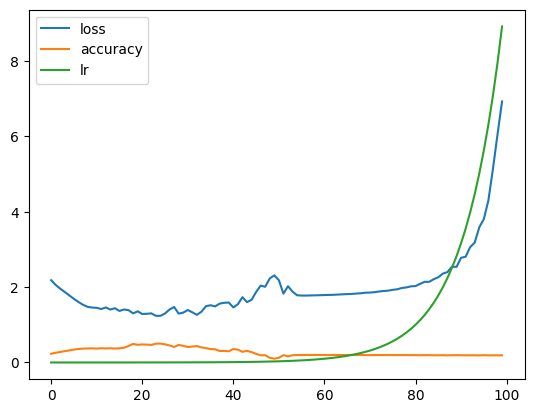

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

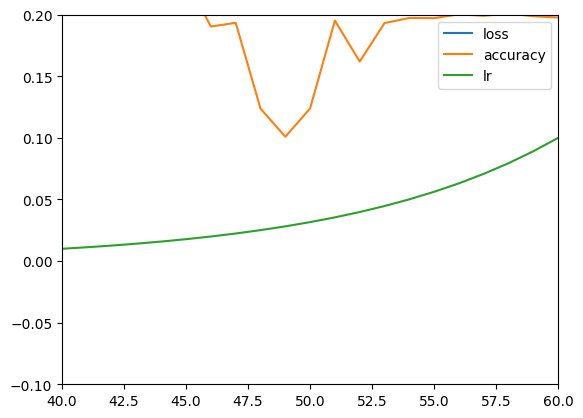

In [ ]:

pd.DataFrame(history.history).plot()


# zooming in
plt.xlim([40,60])
plt.ylim([-0.1,0.2])
plt.show()

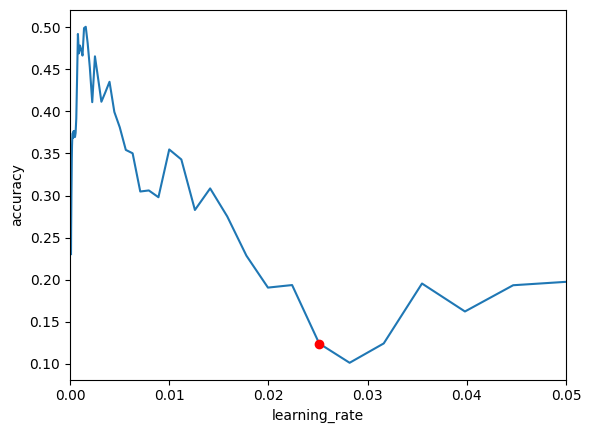

In [ ]:
lr = 10**(-4) * 10**(np.arange(100)/20)

accuracy = history.history['accuracy']


# plotting
plt.plot(lr,accuracy)

plt.xlabel('learning_rate')
plt.ylabel('accuracy')

# zooming in
plt.xlim([0,0.05])

# plotting an apt point
target = 0.025
index = np.argmin(abs(target-lr))

plt.plot(lr[index],accuracy[index],'ro')

plt.show()

In [ ]:
index

48

In [ ]:
lr[index]

0.025118864315095798

# normalizing the Data


**making the values fall between 0 and 1.**


# $$\frac{x-min}{max-min} $$

In [ ]:
# min and max of x_train

np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

ValueError: ignored

In [ ]:
# we do manual scaling as of now as we don't have any idea as to reducing the dimension of the data yet for
# sklearn in-built function to function!

x_train = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
x_test = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test))


x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# improvments made to the data:

1. hidden_layers2 got increased.
2. x_train and x_test got unit normalised(0 and 1).

In [ ]:
# creating the model with normalised data

# building the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape,name='input_layer'))
model2.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model2.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer2'))
model2.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))


# compiling the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# fitting the model
history2 = model2.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))



Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2028 - accuracy: 0.6097 - val_loss: 0.8629 - val_accuracy: 0.7010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7754 - accuracy: 0.7155 - val_loss: 0.7628 - val_accuracy: 0.7276
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7075 - accuracy: 0.7390 - val_loss: 0.7418 - val_accuracy: 0.7319
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6680 - accuracy: 0.7620 - val_loss: 0.6848 - val_accuracy: 0.7621
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6354 - accuracy: 0.7772 - val_loss: 0.6712 - val_accuracy: 0.7697
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6115 - accuracy: 0.7863 - val_loss: 0.6699 - val_accuracy: 0.7669
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5989 - accuracy: 0.7876 - val_loss: 0.6572 - val_accuracy:

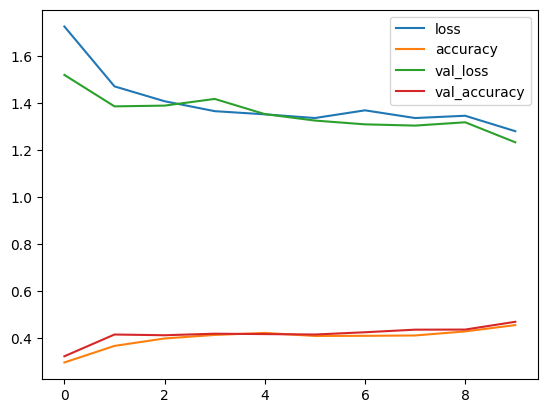

In [ ]:
# plotting the history

pd.DataFrame(history2.history).plot()

plt.show()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
len(class_names)

10

# finding the ideal learning rate

In [ ]:
# building the model
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape,name='input_layer'))
model3.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model3.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer2'))
model3.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))

# compile the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# setting learing rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**(-3) * 10**(epoch/20))


# fitting the model
history3 = model3.fit(x_train,y_train,epochs=40,callbacks=[lr_scheduler],validation_data=(x_test,y_test))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1153 - accuracy: 0.6773 - val_loss: 0.7591 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6753 - accuracy: 0.7764 - val_loss: 0.7043 - val_accuracy: 0.7763 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6044 - accuracy: 0.7968 - val_loss: 0.6036 - val_accuracy: 0.7940 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5807 - accuracy: 0.8001 - val_loss: 0.5895 - val_accuracy: 0.8004 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5690 - accuracy: 0.8001 - val_loss: 0.5795 - val_accuracy: 0.7977 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5622 - accuracy: 0.8034 - val_loss: 0.7044 - val_accuracy: 0.7584 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [ ]:
pd.DataFrame(history3.history).plot()

plt.show()

NameError: ignored

In [ ]:
# focusing on learning_rate and accuracy

lr = history3.history['lr']
accuracy = history3.history['accuracy']


#plotting
plt.plot(lr,accuracy)

plt.xlabel('learing rate')
plt.ylabel('accuracy')


plt.show()

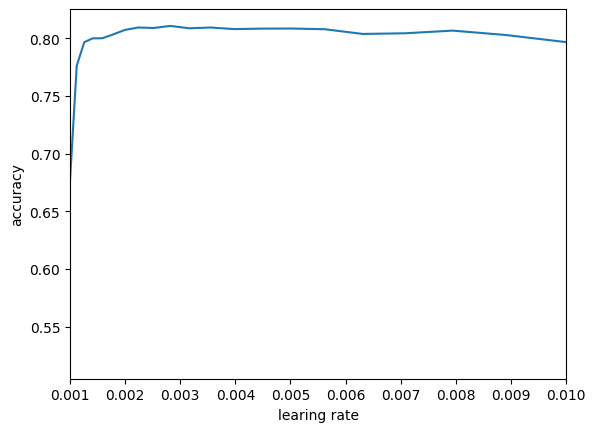

In [ ]:
# focusing on learning_rate and accuracy

lr = history3.history['lr']
accuracy = history3.history['accuracy']


#plotting
plt.plot(lr,accuracy)

plt.xlabel('learing rate')
plt.ylabel('accuracy')


# zoomin in
plt.xlim([0.001,0.01])


plt.show()

# conclusion:

0.001 or 0.002 learning_rate would be ideal

# creating a model with ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# building the model
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape,name='input_layer'))
model4.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model4.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer2'))
model4.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))


# compiling the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])


# fitting the model
history4 = model4.fit(x_train,y_train,epochs=20,verbose=False,validation_data=(x_test,y_test))



In [ ]:
# evaluation
model4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.8078


[0.5806750059127808, 0.8077999949455261]

In [ ]:
# evaluating model2
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6015 - accuracy: 0.7891


[0.6015446186065674, 0.7890999913215637]

# Evaluating our multi-class classification model


1. create a confusion matrix display

2. Assess its prediction

3. improve the performance of the model by training it for longer.

4. save and export it for an application.

313/313 [==============================] - 0s 1ms/step


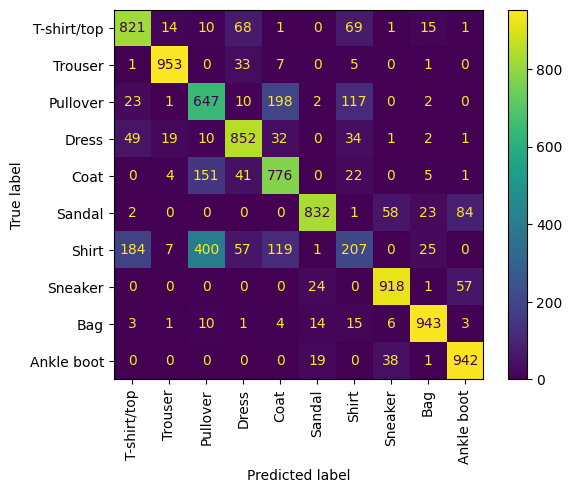

In [ ]:
# creating a confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

actual = y_test
prediction = model2.predict(x_test)
predicted_labels = np.argmax(prediction,axis=1)
cm = confusion_matrix(actual,predicted_labels)

# visualizing the confusion_matrix
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)

disp.plot()

plt.xticks(rotation=90)

plt.show()

In [ ]:
print(classification_report(actual,predicted_labels))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.95      0.95      0.95      1000
           2       0.53      0.65      0.58      1000
           3       0.80      0.85      0.83      1000
           4       0.68      0.78      0.73      1000
           5       0.93      0.83      0.88      1000
           6       0.44      0.21      0.28      1000
           7       0.90      0.92      0.91      1000
           8       0.93      0.94      0.93      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.78      0.79      0.78     10000



313/313 [==============================] - 0s 1ms/step


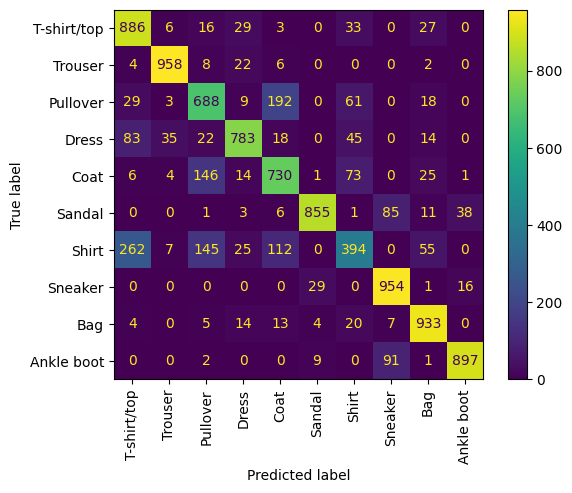

In [ ]:
actual = y_test
prediction = model4.predict(x_test)
prediction = np.argmax(prediction,axis=1)

cm = confusion_matrix(actual,prediction)

# display the result

disp = ConfusionMatrixDisplay(cm,display_labels=class_names)

disp.plot()

plt.xticks(rotation=90)

plt.show()

In [ ]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1000
           1       0.95      0.96      0.95      1000
           2       0.67      0.69      0.68      1000
           3       0.87      0.78      0.82      1000
           4       0.68      0.73      0.70      1000
           5       0.95      0.85      0.90      1000
           6       0.63      0.39      0.48      1000
           7       0.84      0.95      0.89      1000
           8       0.86      0.93      0.89      1000
           9       0.94      0.90      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [ ]:
# conclusion:
# most of the coats and shirts are misinterpreted as pullovers in the predicted label

# exploration,analysis and freethrows:

In [ ]:
prediction

array([[3.2132299e-04, 1.2216463e-03, 1.2619109e-04, ..., 1.0102692e-01,
        2.0361682e-02, 7.6227731e-01],
       [3.6565153e-04, 4.8479662e-05, 4.9337310e-01, ..., 2.5273493e-04,
        2.5457048e-03, 2.4501245e-08],
       [3.9974911e-04, 9.9290490e-01, 5.3169890e-05, ..., 2.1976801e-03,
        2.0111709e-07, 1.5646595e-03],
       ...,
       [2.1739385e-01, 5.4119318e-04, 9.2479229e-02, ..., 2.5433837e-06,
        5.3620722e-02, 2.3413413e-06],
       [4.0784894e-04, 9.9262238e-01, 5.2157433e-05, ..., 1.8171326e-03,
        2.0834548e-07, 1.7888079e-03],
       [6.9229168e-07, 3.1512313e-06, 2.3847045e-03, ..., 1.6568579e-02,
        2.8497565e-03, 9.4033850e-05]], dtype=float32)

In [ ]:
predicted_labels

array([9, 2, 1, ..., 6, 1, 5])

In [ ]:
confusion_matrix

array([[733,   3,   9,  52,   6,   0, 173,   0,  24,   0],
       [  3, 947,   1,  30,   6,   0,   8,   2,   2,   1],
       [ 10,   1, 781,   8,  65,   1, 111,   0,  23,   0],
       [ 25,   9,  10, 789,  76,   4,  72,   1,  14,   0],
       [  1,   0, 637,  15, 282,   1,  59,   1,   4,   0],
       [  0,   0,   2,   0,   2, 888,   0,  51,  29,  28],
       [121,   2, 271,  29,  35,   2, 504,   0,  36,   0],
       [  0,   0,   0,   0,   0,  29,   0, 936,  10,  25],
       [  1,   1,  16,   9,   3,   4,  12,   4, 950,   0],
       [  0,   1,   0,   0,   0,  36,   0,  61,  15, 887]])

# visualizing random model predictions:

# goal:

1. plot a random image

2. predict the label of the image(whether it is shirt or pullover or handbag

3. Label the plot with truth label and predicted label.

In [ ]:
import random

def plot_random_image(model,images,truelabels,classes):

  ''' plots a random image with prediction and truth labels '''

  # set up the random integer
  i = random.randint(0,len(images))

  # create the prediction and true image and label
  target_image = images[i]
  pred_probs   = model.predict(target_image.reshape(1,28,28)) # this is input shape
  pred_label   = classes[np.argmax(pred_probs)]
  true_label   = classes[truelabels[i]]


  # plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)


  # change the color of the xlabel depending on the correctness of the prediction

  if pred_label == true_label:
    color='green'

  else:
    color='red'

    plt.xlabel('prediction:{} {:2.0f}% True:{}'.format(pred_label,
                                                       100*tf.reduce_max(pred_probs),
                                                       true_label),
               color = color)

1/1 [==============================] - 0s 33ms/step


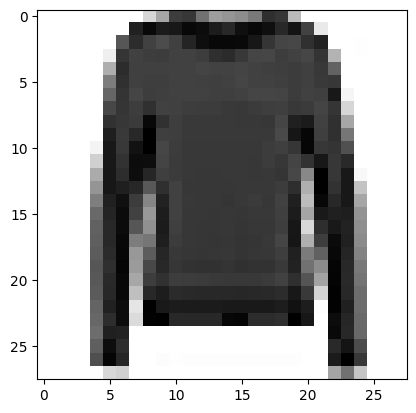

In [ ]:
# plot a random image

plot_random_image(model=model4,
                  images=x_test,
                  truelabels=y_test,
                  classes=class_names)

# exploration,analysis and freethrows

In [ ]:
x_test[6]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.06666667, 0.        , 0.1372549 , 0.21568627,
        0.20392157, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.00392157,
        0.98039216, 1.        , 0.96078431, 0.99607843, 0.93333333,
        0.95686275, 0.9372549 , 0.54117647, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34509804,
        0.48627451, 0.66666667, 0.99607843, 0.54117647, 0.73333333,
        1.        , 0.7333

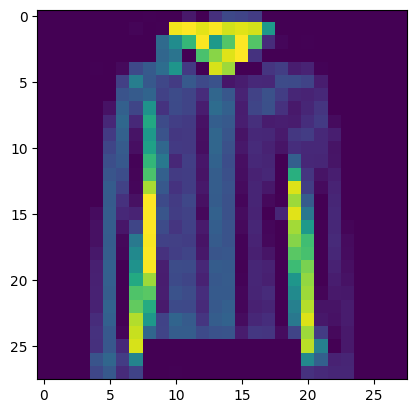

In [ ]:
plt.imshow(x_test[6])

In [ ]:
x_test[6].reshape(1,28,28)

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.        , 0.06666667, 0.        , 0.1372549 , 0.21568627,
         0.20392157, 0.17647059, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.01176471, 0.        , 0.00392157,
         0.98039216, 1.        , 0.96078431, 0.99607843, 0.93333333,
         0.95686275, 0.9372549 , 0.54117647, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.34509804,
         0.48627451, 0.66666667, 0.99607843, 0.54117647, 0.73333333,
         1.

TypeError: ignored

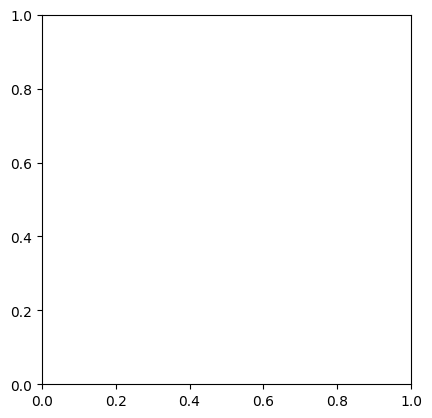

In [ ]:
plt.imshow(x_test[6].reshape(1,28,28))

In [ ]:
pred_probs = model4.predict(x_test[6])

pred_probs

InvalidArgumentError: ignored

In [ ]:
pred_probs = model4.predict(x_test[6].reshape(1,28,28))

pred_probs

1/1 [==============================] - 0s 33ms/step


array([[8.5040921e-04, 6.5843697e-04, 8.5372686e-02, 3.9812960e-03,
        8.4433150e-01, 5.3656969e-04, 4.1474245e-02, 7.6269899e-03,
        1.5003860e-02, 1.6396990e-04]], dtype=float32)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
pred_label = class_names[np.argmax(pred_probs)]

pred_label

'Coat'

In [ ]:
a = np.arange(0,100)

random.choice(a)

29

In [ ]:
len(x_test)

10000

In [ ]:
x = np.arange(0,len(x_test))

random = np.random.choice(x)

random

2938

# correcting the erroneous code given by the instructor in checking whether the actual is = the prediction:

1/1 [==============================] - 0s 23ms/step


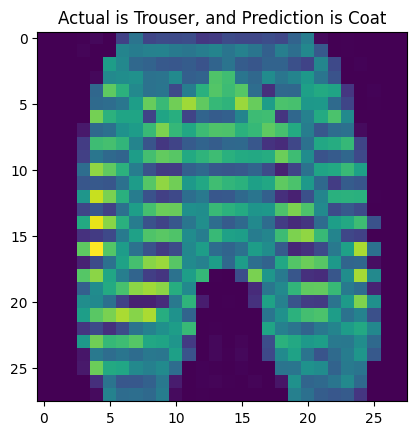

In [ ]:

def plot_random_image(model,x_test,y_test,classes):

  x = np.arange(0,len(x_test))
  random_index = np.random.choice(x)

  target_image = x_test[random_index]
  pred_probability = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[np.argmax(pred_probability)]

  # plotting

  plt.imshow(target_image)

  # if the prediction == Actual thing then print the title in green otherwise red

  prediction = classes[np.argmax(pred_probability)]
  actual     = classes[y_test[random_index]]

  if prediction == actual:
    color = 'green'

  else:
    color = 'red'

  plt.title('Actual is {}, and Prediction is {}'.format(actual,prediction))

plot_random_image(model4,x_test,y_test,class_names)

# revealing the mechanics of the neural network model: unraveling the black box.

In [ ]:
# find the layers of our model4

model4.layers

In [ ]:
# accessing the second layer(hidden_layer1)

model4.layers[1]

In [ ]:
# get the weights and biases of the first hidden_layer1

weights, biases = model4.layers[1].get_weights()

weights,weights.shape

(array([[ 0.35900018, -0.07124085, -0.5732279 , -0.35310438],
        [ 0.20229171,  0.21170007, -0.54646945, -0.66957814],
        [ 0.5889561 ,  0.2550179 , -1.2141099 , -0.6181925 ],
        ...,
        [-0.14023562, -0.02221107, -0.14900023, -0.60936016],
        [-0.0586367 ,  0.01819676, -0.23380202, -0.72741854],
        [ 0.13539186,  0.6046351 , -0.61570746,  0.6354292 ]],
       dtype=float32),
 (784, 4))

In [ ]:
# the rows of the weights come from the dimesion a single image

28*28

784

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# getting a summary of our model
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 4)                 3140      
                                                                 
 hidden_layer2 (Dense)       (None, 4)                 20        
                                                                 
 output_layer (Dense)        (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# biases

In [ ]:
# exploring the biases of the hidden_layer1
biases,biases.shape

(array([ 0.18565983, -0.20444122, -0.74878967, -0.27226928], dtype=float32),
 (4,))

every neuron has a bias vector. each of these bias vector is paired with a weights matrix.

The bias vector gets initialized as zeros.


each weight matrix is assigned a bias vector and this bias vector influences how much the weight matrix of one layer should influence the next neural layer. so bias is a scaler that scales up or down the values of the weight matrix.

# weights:

kernal_initializer: intialized with glorot_uniform. filled with some random numbers but as the network tries to find pattern in the data those random_numbers get adjusted to resemble the pattern as closely as possible.

# biases:

bias_initializer = zeros. initialized with zeros and then modified.

each weight matrix is assigned a bias vector and this bias vector influences how much the weight matrix of one layer should influence the next neural layer. so bias is a scaler that scales up or down the values of the weight matrix.
